In [ ]:
pip install requests matplotlib numpy scipy seaborn pandas

In [2]:
import requests

In [3]:
def getPeriodsByYear(year):
    url = "https://www.glo.or.th/api/lottery/getPeriodsByYear"
    payload = {"type": "CHECKED", "year": str(year)}
    try:
        res = requests.post(url, payload)
        res = res.json()
        if (res["statusCode"] == 200):
            return res["response"]["result"]
        return None

    except Exception as e:
        print(f"Error: {e}")

In [ ]:
p_year = getPeriodsByYear("2024")
p_year

In [5]:
def removeDuplicatePeriods(data_api):
    result = []
    for e in data_api:
        result.append(e["date"])
    return list(dict.fromkeys(result))

In [ ]:
removeDuplicatePeriods(p_year)

In [7]:
def getLotteryResult(date, month, year):
    url = "https://www.glo.or.th/api/checking/getLotteryResult"
    payload = {"date": str(date), "month": str(month), "year": str(year)}
    try:
        res = requests.post(url, payload)
        res = res.json()
        if (res["statusCode"] == 200):
            return res["response"]["result"]["data"]
        return None
    
    except Exception as e:
        print(f"Error: {e}")

In [ ]:
data_api = getLotteryResult("01", "02", "2024")
data_api

In [27]:
import time

def groupPrizesByYear(start_year, end_year):  
    result = {
        "first": [],
        "second": [],
        "third": [],
        "fourth": [],
        "fifth": [],
        "last2": [],
        "last3f": [],
        "last3b": [],
        "near1": []
    }
    for year in range(int(start_year), int(end_year) + 1):
        periods = getPeriodsByYear(str(year))
        periods = removeDuplicatePeriods(periods)
        print(f"year: {year} =====")    
        for period in periods:
            print(period)
            [year_, month, date] = period.split("-")
            data_api = getLotteryResult(date, month, year_)
            for key, value in data_api.items():
                for number in value["number"]:
                    result[key].append(int(number["value"]))
            time.sleep(5)
    return result

In [31]:
start_year = "2024"
end_year = "2024"
data = groupPrizesByYear(start_year, end_year)
data

year: 2024
2024-12-16
2024-12-01
2024-11-16
2024-11-01
2024-10-16
2024-10-01
2024-09-16
2024-09-01
2024-08-16
2024-08-01
2024-07-16
2024-07-01
2024-06-16
2024-06-01
2024-05-16
2024-05-02
2024-04-16
2024-04-01
2024-03-16
2024-03-01
2024-02-16
2024-02-01
2024-01-17


{'first': [97863,
  669843,
  187221,
  536044,
  482962,
  718665,
  608662,
  199606,
  95867,
  407041,
  367336,
  434503,
  518504,
  530593,
  205690,
  980116,
  943598,
  803481,
  997626,
  253603,
  941395,
  607063,
  105979],
 'second': [77335,
  142161,
  208137,
  773959,
  885770,
  127223,
  141669,
  257611,
  362623,
  511822,
  164480,
  339596,
  459403,
  739382,
  856492,
  170220,
  297790,
  504140,
  700568,
  807952,
  42170,
  91247,
  209783,
  887149,
  960616,
  618304,
  619457,
  706570,
  803186,
  920212,
  474510,
  544978,
  705432,
  841682,
  910627,
  190588,
  218971,
  253914,
  536661,
  878717,
  38546,
  226374,
  469262,
  469899,
  974224,
  46930,
  127568,
  596170,
  848197,
  921155,
  4776,
  347960,
  388714,
  886001,
  911595,
  51210,
  119336,
  120284,
  643628,
  779915,
  25373,
  318468,
  336234,
  491146,
  929480,
  29712,
  356805,
  792363,
  808128,
  938867,
  51664,
  418448,
  589461,
  753950,
  862515,
  62041,
  26

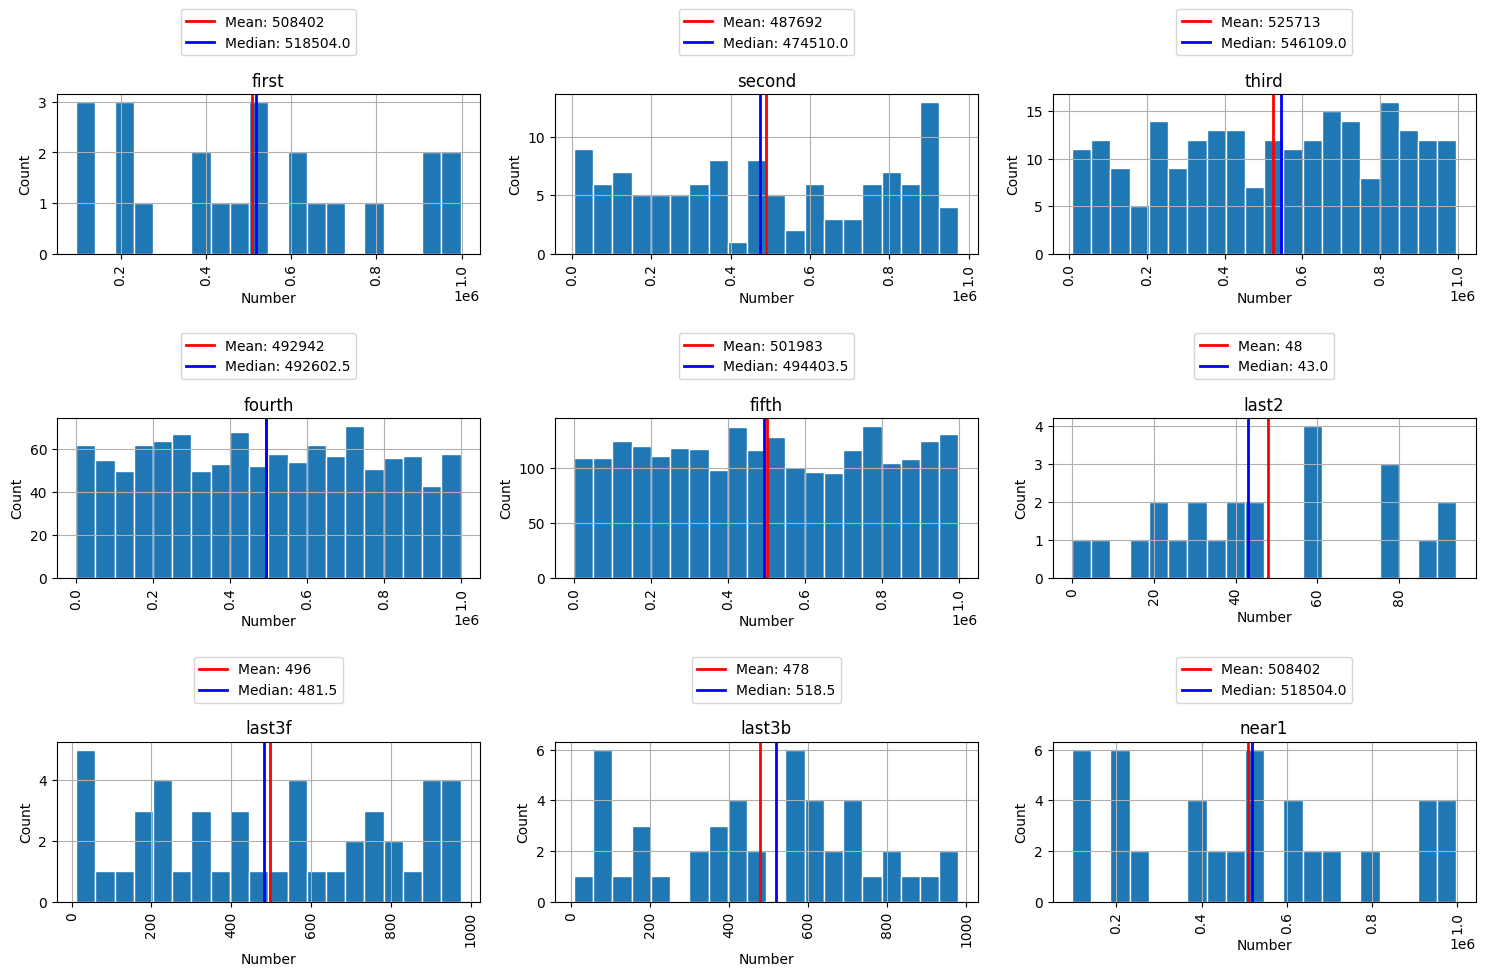

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

f,ax = plt.subplots(3,3, figsize=(15, 10))
ax = ax.ravel()
for idx, (key, values) in enumerate(data.items()):
    mean = int(np.mean(values))
    std = int(np.std(values))
    median = np.median(values)
    # mode = stats.mode(values)
    # print(mode)

    ax[idx].axvline(x=mean, linewidth=2, color='r', label=f'Mean: {mean}')
    ax[idx].axvline(x=median, linewidth=2, color='b', label=f'Median: {median}')
    ax[idx].tick_params(axis='x', rotation=90)
    # The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 
    ax[idx].hist(values, edgecolor='white', bins=20)
    ax[idx].set_title(f"{key}")
    ax[idx].set_xlabel("Number")
    ax[idx].set_ylabel("Count")
    ax[idx].legend(loc='lower center', bbox_to_anchor=(0.5, 1.2), ncol=1)
    ax[idx].grid()

plt.tight_layout()